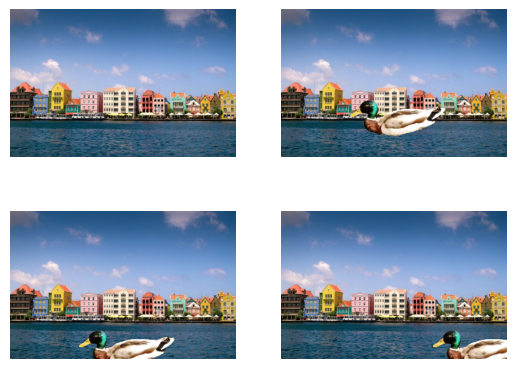

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def combineForegroundBackground(fgImg, fgMask, bgImg, topLeft):
    # Get the dimensions of the foreground image and background image
    fgH, fgW = fgImg.shape[:2]
    bgH, bgW = bgImg.shape[:2]

    # Get the position of the top-left corner of the foreground image in the background image
    fgTop, fgLeft = topLeft

    # Calculate the position of the bottom-right corner of the foreground image in the background image
    fgBottom = fgTop + fgH
    fgRight = fgLeft + fgW

    # Create a copy of the background image
    outputImg = bgImg.copy()

    # Loop through each pixel in the foreground mask
    for y in range(fgH):
        for x in range(fgW):
            # If the pixel belongs to the foreground object
            if fgMask[y,x] > 0:
                # Calculate the corresponding position in the background image
                bgX = fgLeft + x
                bgY = fgTop + y

                # Make sure the position is within the bounds of the background image
                if bgX >= 0 and bgX < bgW and bgY >= 0 and bgY < bgH:
                    # Copy the pixel value from the foreground image to the background image
                    outputImg[bgY,bgX] = fgImg[y,x]

    return outputImg

# Load the foreground image and mask
fgImg = cv2.imread('duck.jpg')
fgMask = cv2.imread('duck2.png', cv2.IMREAD_GRAYSCALE)

# Load the background image
bgImg = cv2.imread('houses.jpg')

# Define the position of the top-left corner of the foreground image in the background image
topLeft = (50, 3)
topLeft2= (100, 3)
topRight= (100, 150)

# Combine the foreground and background images

plt.subplot(2, 2, 1)
plt.axis('off')
plt.imshow(bgImg[:,:,::-1])

combinedImg = combineForegroundBackground(fgImg, fgMask, bgImg, topLeft)
plt.subplot(2, 2, 2)
plt.axis('off')
plt.imshow(combinedImg[:,:,::-1])

combinedImg1 = combineForegroundBackground(fgImg, fgMask, bgImg, topLeft2)
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(combinedImg1[:,:,::-1])


combinedImg2 = combineForegroundBackground(fgImg, fgMask, bgImg, topRight)
plt.subplot(2,2,4)
plt.axis('off')
plt.imshow(combinedImg2[:,:,::-1])


plt.show()